In [1]:
from pathlib import Path

project_root_path = Path.cwd().parent
project_root_path

WindowsPath('F:/projects_ssd/tfm/tfm-rl-starcraft2')

In [63]:
models_path = project_root_path / "models"
random_models_path = models_path / "random"
single_random_models_path = random_models_path / "single"
# models_path = project_root_path / "models_or"
models_path

WindowsPath('F:/projects_ssd/tfm/tfm-rl-starcraft2/models')

In [75]:
import pandas as pd
import numpy as np

def assign_phase(row):
    if row["is_exploit"]:
        return "Exploit"
    if row["is_training"]:
        return "Training"
    return "Burn-in"


def get_agent_stats(model_id: str, model_path: str | Path):
    model_path = model_path / model_id
    agent_stats_path = model_path / "agent_stats.parquet"
    
    return pd.read_parquet(agent_stats_path)

def get_aggregated_stats(model_id: str, model_path: str | Path):
    model_path = model_path / model_id
    aggregated_stats_path = model_path / "aggregated_stats.parquet"

    return pd.read_parquet(aggregated_stats_path)

def get_episode_stats(model_id: str, model_path: str | Path):
    model_path = model_path / model_id
    episode_stats_path = model_path / "episode_stats.parquet"

    episode_stats = pd.read_parquet(episode_stats_path)
    episode_stats['episode'] = np.arange(len(episode_stats))

    episode_stats["loss"] = episode_stats["losses"].apply(lambda losses: np.mean(losses))
    episode_stats['mean_loss_10ep'] = episode_stats['loss'].rolling(10).mean()
    episode_stats['mean_rewards_10ep'] = episode_stats['reward'].rolling(10).mean()
    episode_stats['mean_adjusted_rewards_10ep'] = episode_stats['adjusted_reward'].rolling(10).mean()
    episode_stats['mean_scores_10ep'] = episode_stats['score'].rolling(10).mean()
    
    return episode_stats

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(12, 6)})

def plot_rewards(episode_stats, title_prefix: str):
    sns.lineplot(data=episode_stats, x="episode", y="reward", hue="initial_stage").set_title(f"{title_prefix} - Reward over time")
    sns.lineplot(data=episode_stats, x="episode", y="mean_rewards_10ep", palette=["orange"], label="Mean Reward (10ep)")
    plt.show()

def plot_adjusted_rewards(episode_stats, title_prefix: str):
    sns.lineplot(data=episode_stats, x="episode", y="adjusted_reward", hue="initial_stage").set_title(f"{title_prefix} - Adjusted Reward over time")
    sns.lineplot(data=episode_stats, x="episode", y="mean_adjusted_rewards_10ep", palette=["orange"], label="Mean Adjusted Reward (10ep)")
    plt.show()

def plot_scores(episode_stats, title_prefix: str):
    sns.lineplot(data=episode_stats, x="episode", y="score", hue="initial_stage").set_title(f"{title_prefix} - Score over time")
    sns.lineplot(data=episode_stats, x="episode", y="mean_scores_10ep", palette=["orange"], label="Mean Score (10ep)")
    plt.show()

def plot_losses(episode_stats, title_prefix: str):
    sns.lineplot(data=episode_stats, x="episode", y="loss", hue="initial_stage").set_title(f"{title_prefix} - Loss over time")
    sns.lineplot(data=episode_stats, x="episode", y="mean_loss_10ep", palette=["orange"], label="Mean Loss (10ep)")
    plt.show()

def plot_epsilon(episode_stats, title_prefix: str):
    sns.lineplot(data=episode_stats, x="episode", y="epsilon", hue="initial_stage").set_title(f"{title_prefix} - Epsilon over time")
    plt.show()

In [103]:
def load_stats(model_id, model_name: str, model_path: str | Path, show_plots: bool = True):
    agent_stats = get_agent_stats(model_id, model_path)
    aggregated_stats = get_aggregated_stats(model_id, model_path)
    episode_stats = get_episode_stats(model_id, model_path)
    total_episodes = len(episode_stats)
    total_training_episodes = len(episode_stats[episode_stats["initial_stage"] == "TRAINING"])
    total_exploit_episodes = len(episode_stats[episode_stats["initial_stage"] == "EXPLOIT"])
    total_burnin_episodes = len(episode_stats[episode_stats["initial_stage"] == "BURN_IN"])
    total_random_mode_episodes = len(episode_stats[episode_stats["is_random_mode"] == True])
    print(f"Total episodes: {total_episodes}")
    print(f"Total burnin episodes: {total_burnin_episodes}")
    print(f"Total random mode episodes: {total_random_mode_episodes}")
    print(f"Total episodes: {total_training_episodes}")
    print(f"Total exploit episodes: {total_exploit_episodes}")
    print("Unique maps in episode stats: ", episode_stats["map_name"].unique())

    if show_plots:
        plot_stats(episode_stats, model_name)
    
    return episode_stats, agent_stats, aggregated_stats
    

In [96]:
def plot_stats(episode_stats, model_name):
    plot_rewards(episode_stats, model_name) ;
    plot_adjusted_rewards(episode_stats, model_name) ;
    plot_scores(episode_stats, model_name) ;
    plot_losses(episode_stats, model_name) ;
    plot_epsilon(episode_stats, model_name) ;

In [53]:
base_model_id = "single_drl"
collect_minerals_model_id = f"{base_model_id}_collect_minerals"
build_marines_model_id = f"{base_model_id}_build_marines"
defeat_roaches_model_id = f"{base_model_id}_defeat_roaches"
defeat_zerglings_model_id = f"{base_model_id}_defeat_zerglings_and_banelings"
simple64_model_id = f"{base_model_id}_simple64"

# Single agent(s)

## Random

### Collect minerals - standalone

Total episodes: 200
Total burnin episodes: 0
Total random mode episodes: 0
Total episodes: 0
Total exploit episodes: 200
Unique maps in episode stats:  ['CollectMineralsAndGas']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount
C:\Users\alghi\AppData\Local\Temp\ipykernel_32840\451922844.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=episode_stats, x="episode", y="mean_rewards_10ep", palette=["orange"], label="Mean Reward (10ep)")


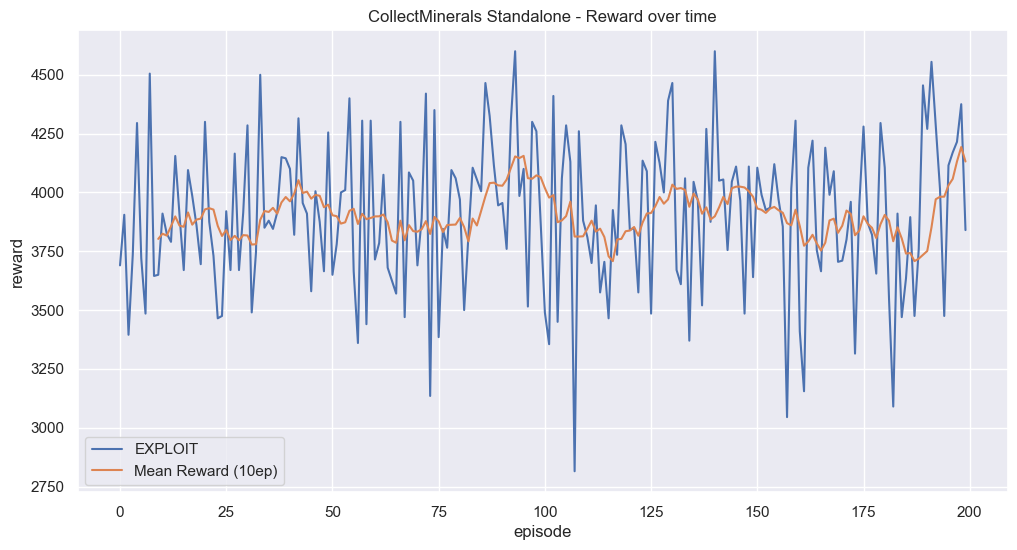

C:\Users\alghi\AppData\Local\Temp\ipykernel_32840\451922844.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=episode_stats, x="episode", y="mean_adjusted_rewards_10ep", palette=["orange"], label="Mean Adjusted Reward (10ep)")


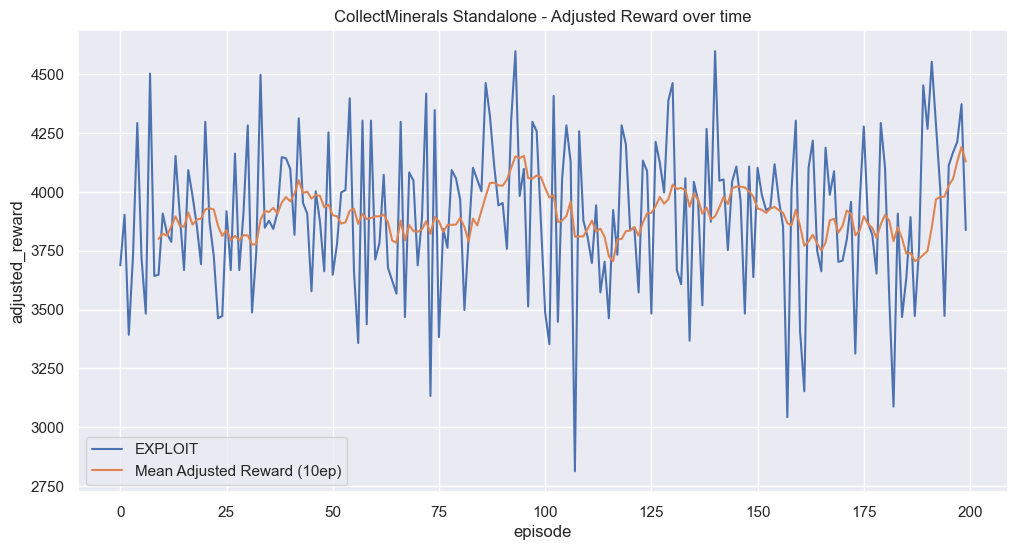

C:\Users\alghi\AppData\Local\Temp\ipykernel_32840\451922844.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=episode_stats, x="episode", y="mean_scores_10ep", palette=["orange"], label="Mean Score (10ep)")


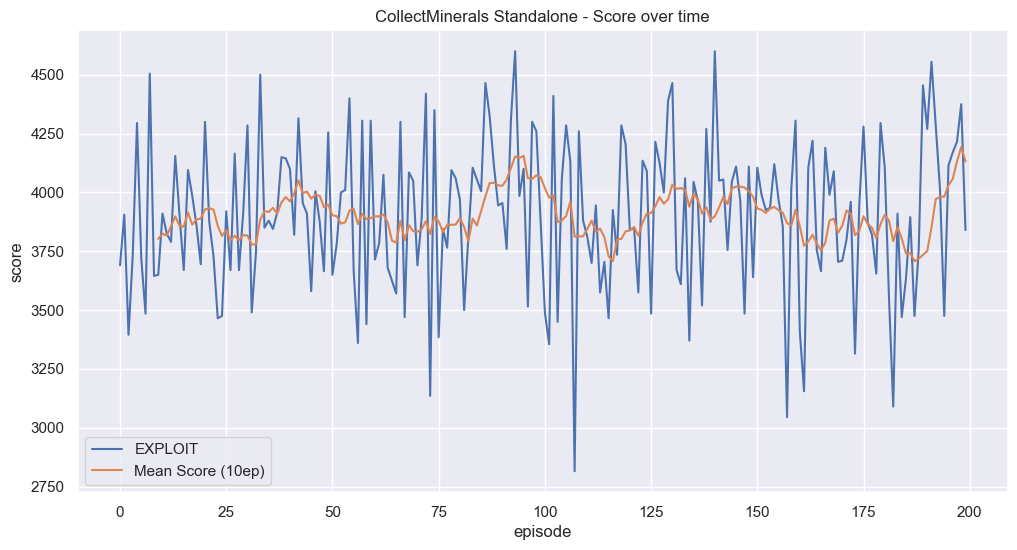

C:\Users\alghi\AppData\Local\Temp\ipykernel_32840\451922844.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=episode_stats, x="episode", y="mean_loss_10ep", palette=["orange"], label="Mean Loss (10ep)")


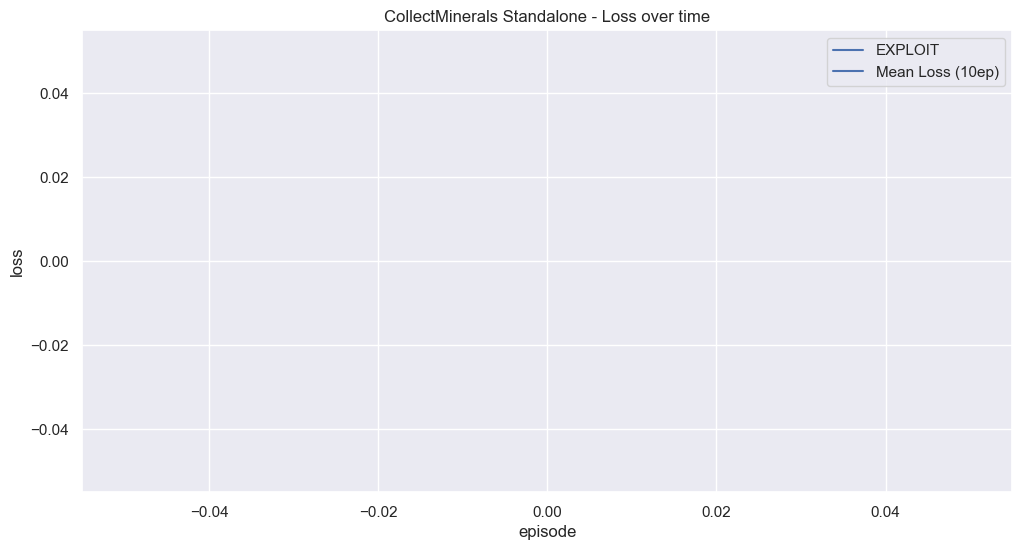

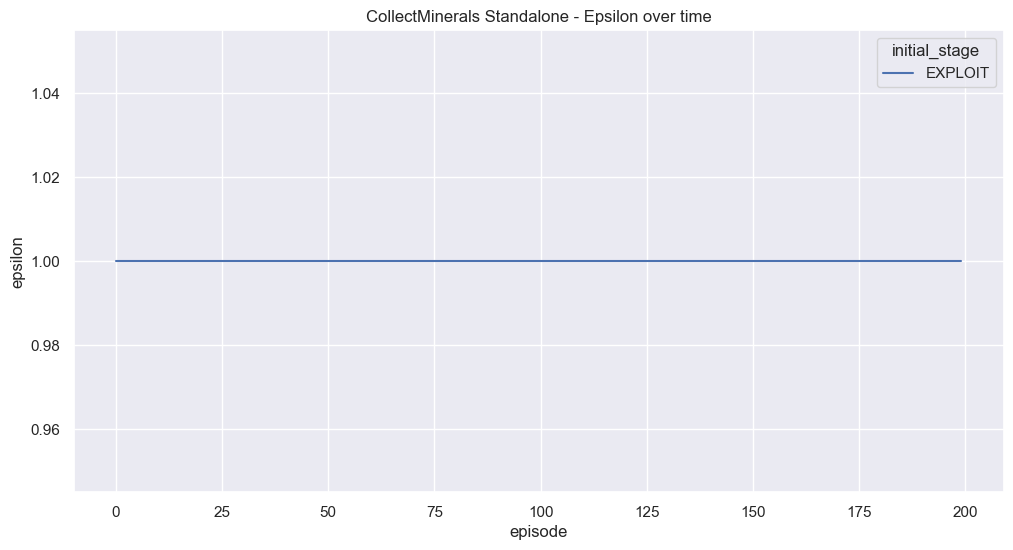

,map_name,reward,adjusted_reward,steps,epsilon,losses,emissions,score,is_burnin,is_training,...,initial_stage,final_stage,episode,loss,invalid_action_counts,valid_action_counts,mean_loss_10ep,mean_rewards_10ep,mean_adjusted_rewards_10ep,mean_scores_10ep
0,CollectMineralsAndGas,3690.0,3687.89,211,1.0,[],0.000232,3690.0,False,True,...,EXPLOIT,EXPLOIT,0,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",NaN,NaN,NaN,NaN
1,CollectMineralsAndGas,3905.0,3902.89,211,1.0,[],0.000492,3905.0,False,True,...,EXPLOIT,EXPLOIT,1,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",NaN,NaN,NaN,NaN
2,CollectMineralsAndGas,3395.0,3392.89,211,1.0,[],0.000734,3395.0,False,True,...,EXPLOIT,EXPLOIT,2,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",NaN,NaN,NaN,NaN
3,CollectMineralsAndGas,3735.0,3732.89,211,1.0,[],0.000969,3735.0,False,True,...,EXPLOIT,EXPLOIT,3,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",NaN,NaN,NaN,NaN
4,CollectMineralsAndGas,4295.0,4292.89,211,1.0,[],0.001212,4295.0,False,True,...,EXPLOIT,EXPLOIT,4,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",NaN,NaN,NaN,NaN


In [104]:
collect_minerals_model_id ="collect_minerals"
episode_stats, agent_stats, aggregated_stats = load_stats(collect_minerals_model_id, model_path=single_random_models_path, model_name="CollectMinerals Standalone")
episode_stats.head()

### Build marines

Total episodes: 200
Total burnin episodes: 0
Total random mode episodes: 0
Total episodes: 0
Total exploit episodes: 200
Unique maps in episode stats:  ['BuildMarines']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount
C:\Users\alghi\AppData\Local\Temp\ipykernel_32840\451922844.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=episode_stats, x="episode", y="mean_rewards_10ep", palette=["orange"], label="Mean Reward (10ep)")


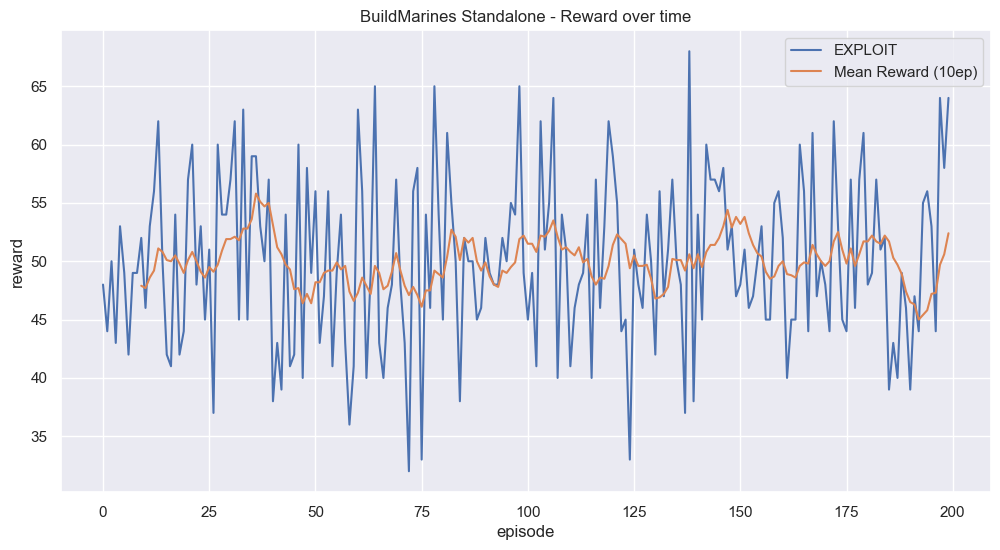

C:\Users\alghi\AppData\Local\Temp\ipykernel_32840\451922844.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=episode_stats, x="episode", y="mean_adjusted_rewards_10ep", palette=["orange"], label="Mean Adjusted Reward (10ep)")


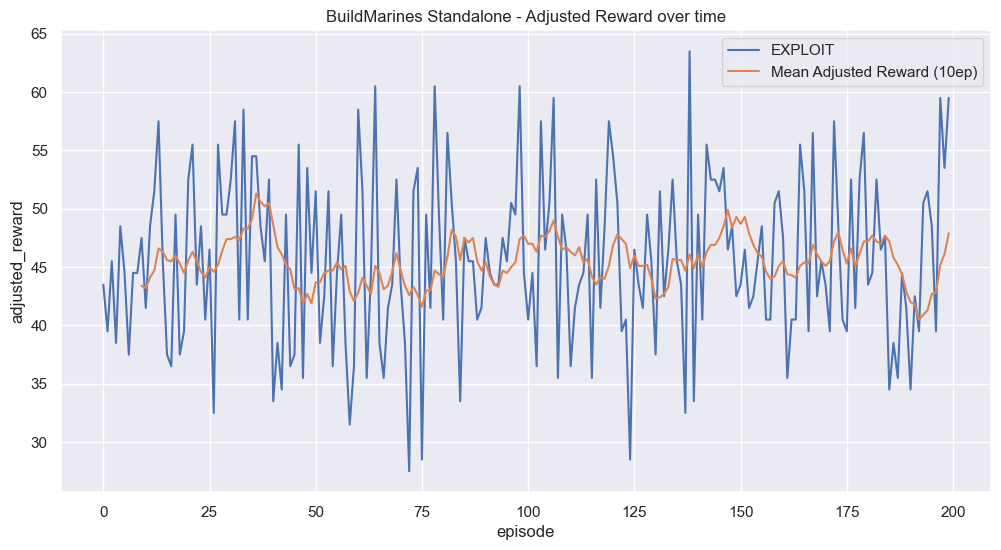

C:\Users\alghi\AppData\Local\Temp\ipykernel_32840\451922844.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=episode_stats, x="episode", y="mean_scores_10ep", palette=["orange"], label="Mean Score (10ep)")


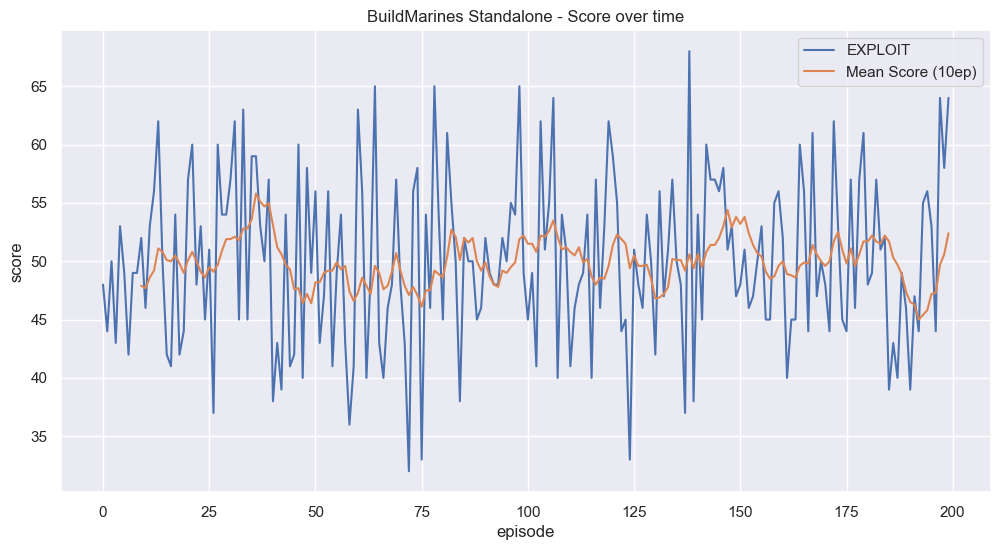

C:\Users\alghi\AppData\Local\Temp\ipykernel_32840\451922844.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=episode_stats, x="episode", y="mean_loss_10ep", palette=["orange"], label="Mean Loss (10ep)")


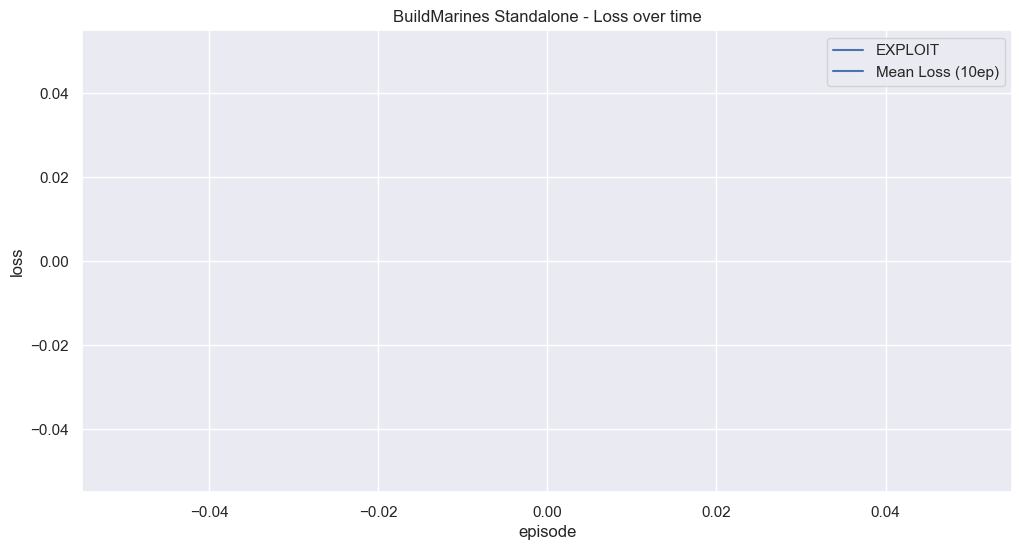

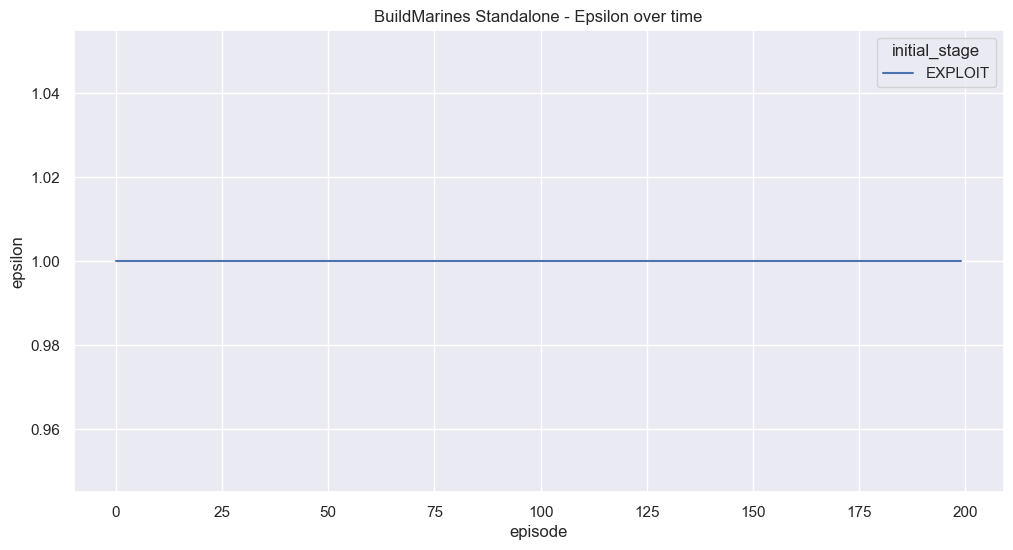

,map_name,reward,adjusted_reward,steps,epsilon,losses,emissions,score,is_burnin,is_training,...,initial_stage,final_stage,episode,loss,invalid_action_counts,valid_action_counts,mean_loss_10ep,mean_rewards_10ep,mean_adjusted_rewards_10ep,mean_scores_10ep
0,BuildMarines,48.0,43.49,451,1.0,[],0.000706,48.0,False,True,...,EXPLOIT,EXPLOIT,0,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",NaN,NaN,NaN,NaN
1,BuildMarines,44.0,39.49,451,1.0,[],0.001576,44.0,False,True,...,EXPLOIT,EXPLOIT,1,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",NaN,NaN,NaN,NaN
2,BuildMarines,50.0,45.49,451,1.0,[],0.002437,50.0,False,True,...,EXPLOIT,EXPLOIT,2,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",NaN,NaN,NaN,NaN
3,BuildMarines,43.0,38.49,451,1.0,[],0.003266,43.0,False,True,...,EXPLOIT,EXPLOIT,3,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",NaN,NaN,NaN,NaN
4,BuildMarines,53.0,48.49,451,1.0,[],0.004097,53.0,False,True,...,EXPLOIT,EXPLOIT,4,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",NaN,NaN,NaN,NaN


In [105]:
collect_minerals_model_id ="build_marines"
episode_stats, agent_stats, aggregated_stats = load_stats(collect_minerals_model_id, model_path=single_random_models_path, model_name="BuildMarines Standalone")
episode_stats.head()

Total episodes: 68
Total burnin episodes: 48
Total random mode episodes: 0
Total episodes: 20
Total exploit episodes: 0
Unique maps in episode stats:  ['CollectMineralsAndGas']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


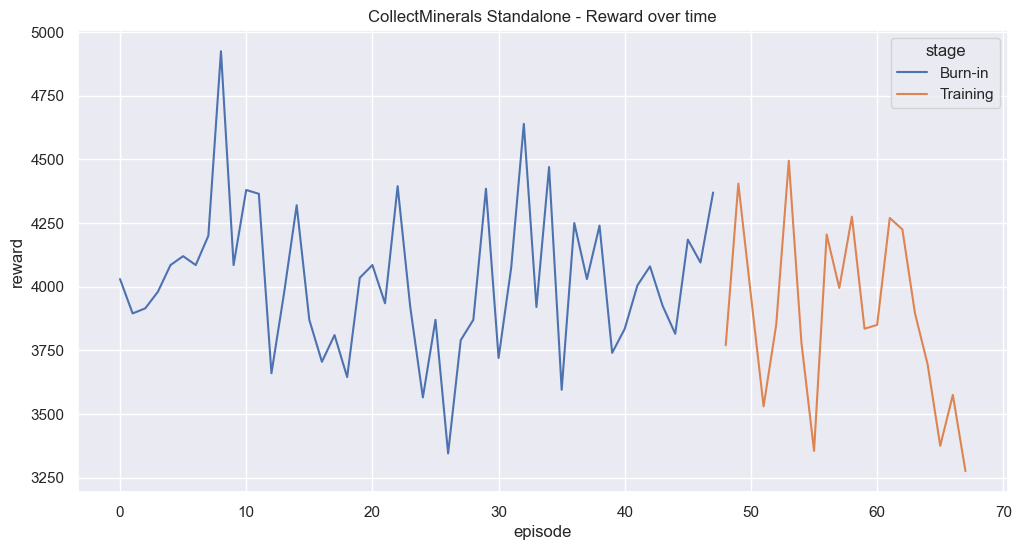

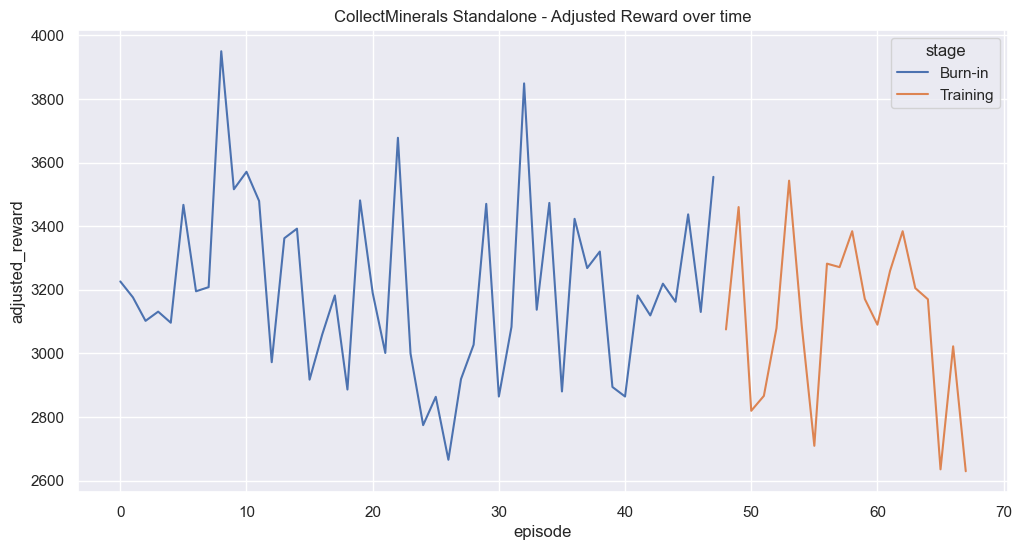

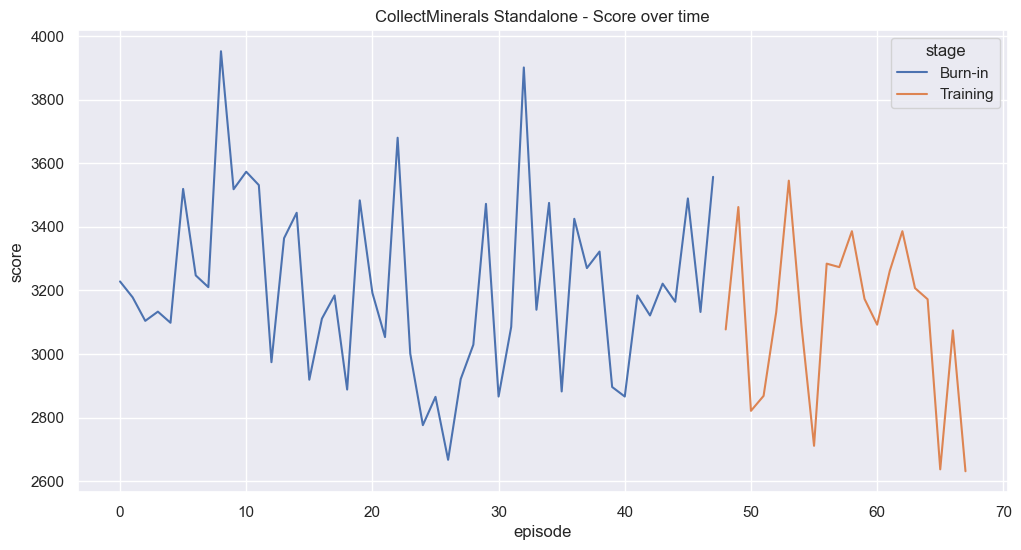

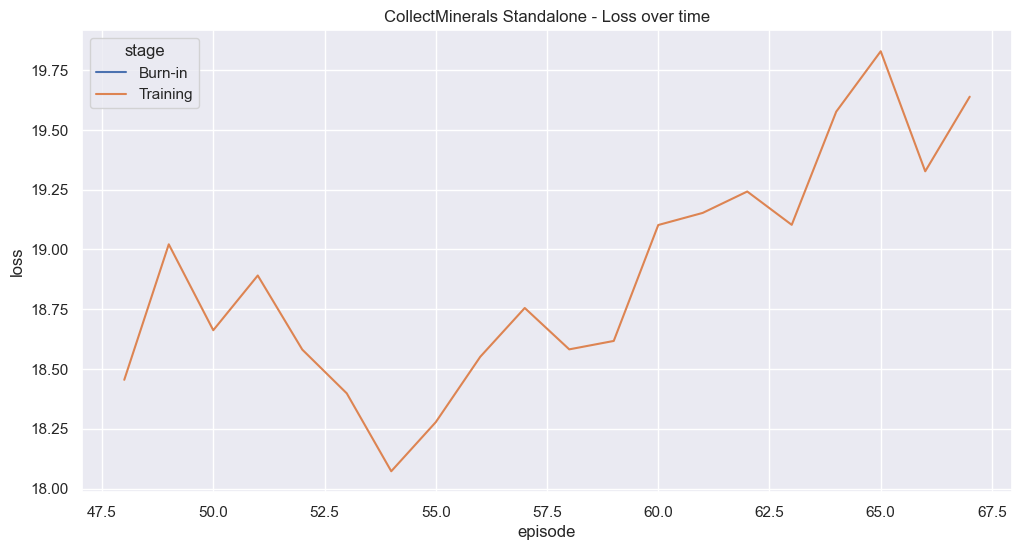

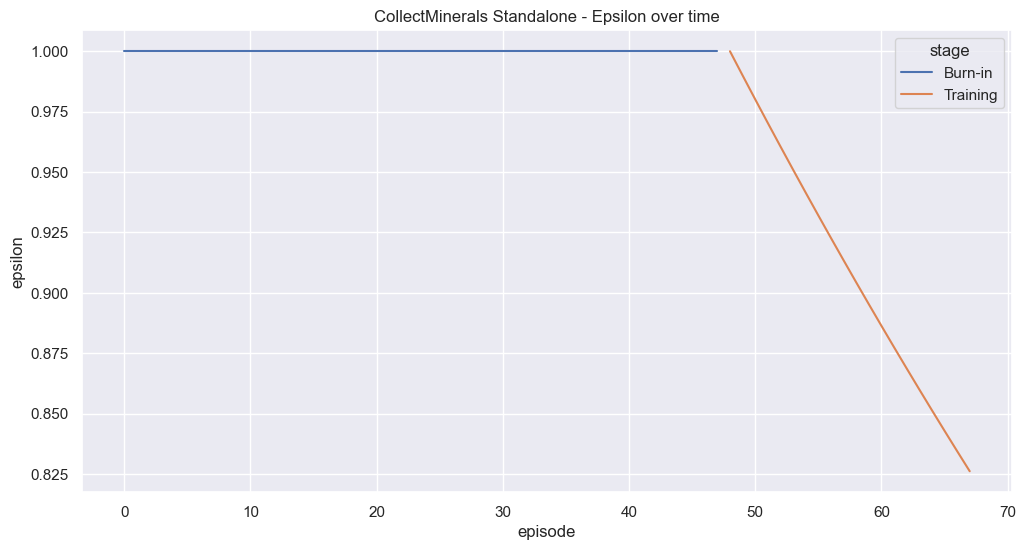

,map_name,reward,adjusted_reward,steps,epsilon,losses,emissions,score,is_burnin,is_training,is_exploit,is_random_mode,initial_stage,final_stage,episode,loss,invalid_action_counts,valid_action_counts,stage
0,CollectMineralsAndGas,4030.0,3226.31,211,1.0,[],0.000435,3228.0,True,False,False,False,burn-in,burn-in,0,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",Burn-in
1,CollectMineralsAndGas,3895.0,3176.26,211,1.0,[],0.000881,3178.0,True,False,False,False,burn-in,burn-in,1,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",Burn-in
2,CollectMineralsAndGas,3915.0,3102.30,211,1.0,[],0.001301,3104.0,True,False,False,False,burn-in,burn-in,2,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",Burn-in
3,CollectMineralsAndGas,3980.0,3131.31,211,1.0,[],0.001731,3133.0,True,False,False,False,burn-in,burn-in,3,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",Burn-in
4,CollectMineralsAndGas,4085.0,3096.41,211,1.0,[],0.002170,3098.0,True,False,False,False,burn-in,burn-in,4,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",Burn-in


In [62]:
test_collect_minerals_model_id = f"test_{base_model_id}_collect_minerals"
episode_stats, agent_stats, aggregated_stats = load_stats(test_collect_minerals_model_id, model_name="CollectMinerals Standalone")
episode_stats.head()

Total episodes: 548
Total burnin episodes: 48
Total random mode episodes: 0
Total episodes: 500
Total exploit episodes: 0
Unique maps in episode stats:  ['CollectMineralsAndGas']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


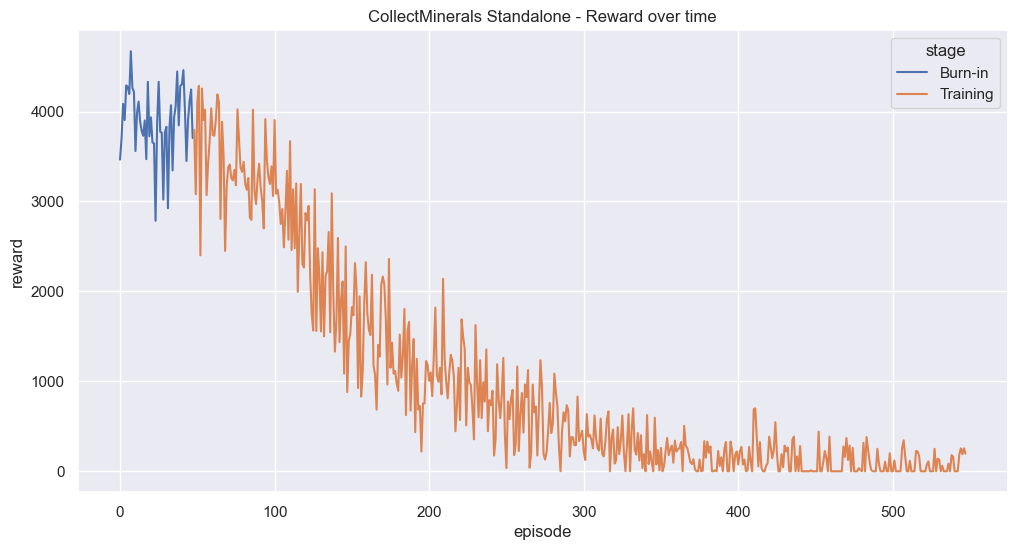

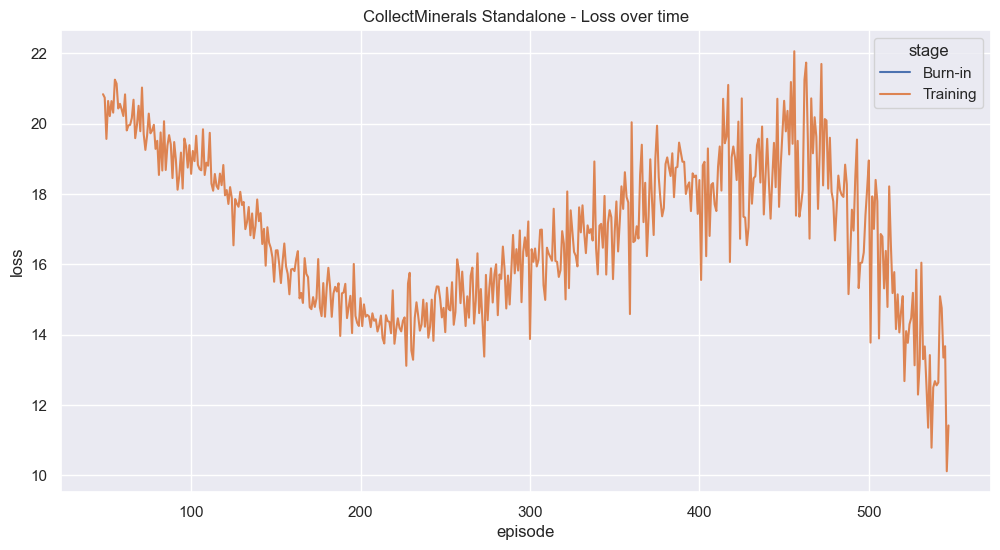

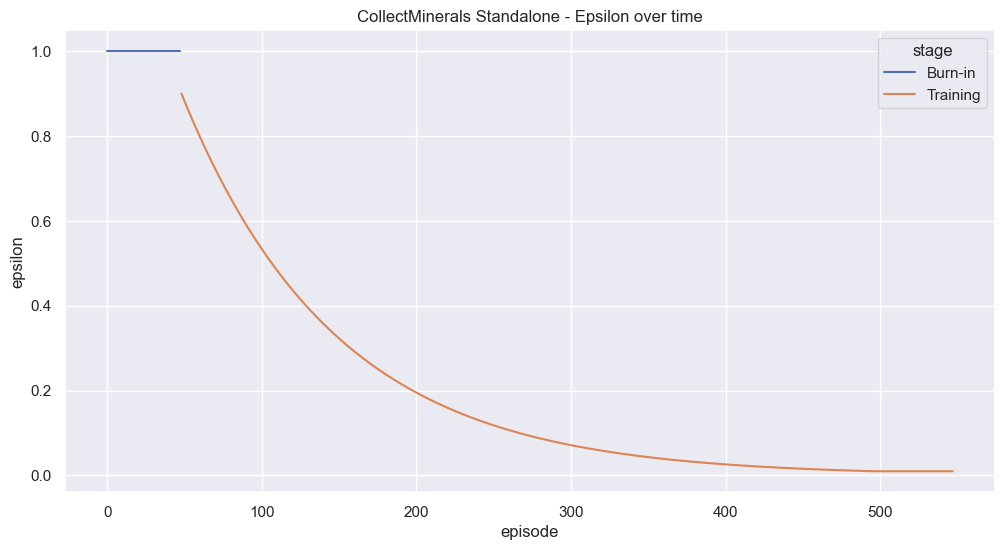

,map_name,reward,steps,epsilon,losses,emissions,is_burnin,is_training,is_exploit,is_random_mode,initial_stage,final_stage,episode,loss,invalid_action_counts,valid_action_counts,stage
0,CollectMineralsAndGas,3465.0,211,1.0,[],0.000488,True,False,False,False,burn-in,burn-in,0,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",Burn-in
1,CollectMineralsAndGas,3705.0,211,1.0,[],0.000977,True,False,False,False,burn-in,burn-in,1,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",Burn-in
2,CollectMineralsAndGas,4085.0,211,1.0,[],0.001458,True,False,False,False,burn-in,burn-in,2,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",Burn-in
3,CollectMineralsAndGas,3905.0,211,1.0,[],0.001917,True,False,False,False,burn-in,burn-in,3,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",Burn-in
4,CollectMineralsAndGas,4290.0,211,1.0,[],0.002383,True,False,False,False,burn-in,burn-in,4,NaN,"{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...","{'ATTACK_WITH_SINGLE_UNIT': 0, 'BUILD_BARRACKS...",Burn-in


In [57]:
episode_stats, agent_stats, aggregated_stats = load_stats(collect_minerals_model_id, model_name="CollectMinerals Standalone")
episode_stats.head()

Total episodes: 300
Total burnin episodes: 71
Total random mode episodes: 0
Total episodes: 229
Total exploit episodes: 0
Unique maps in episode stats:  ['CollectMineralsAndGas']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


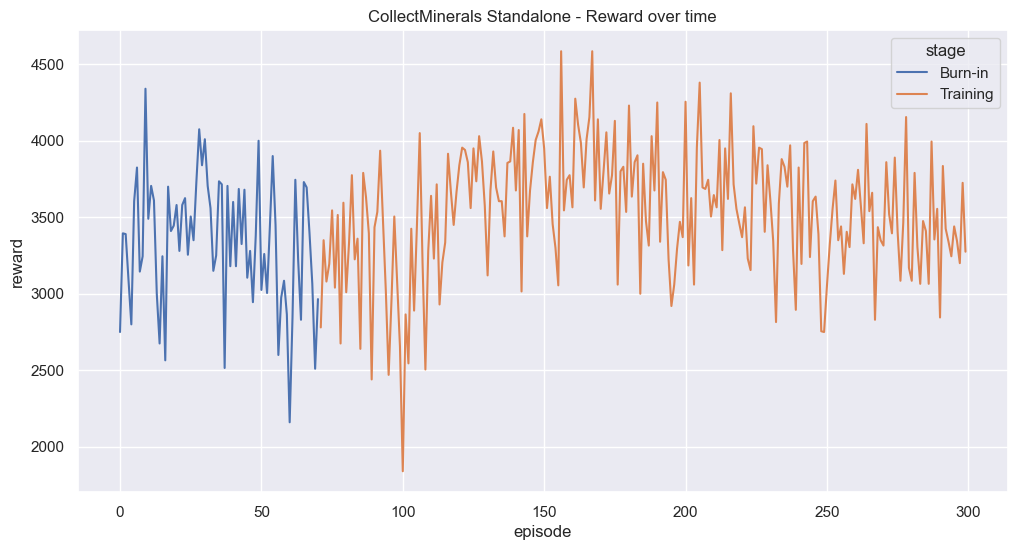

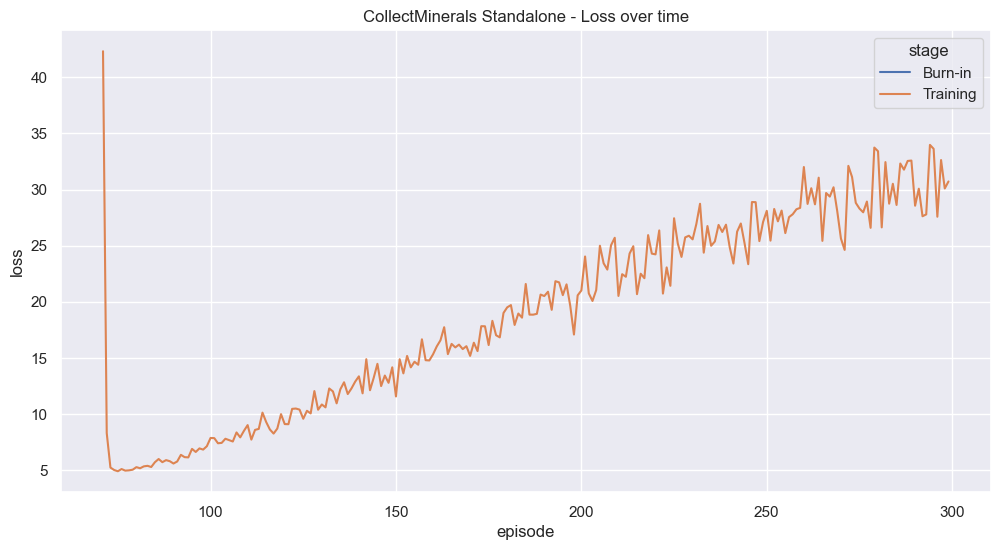

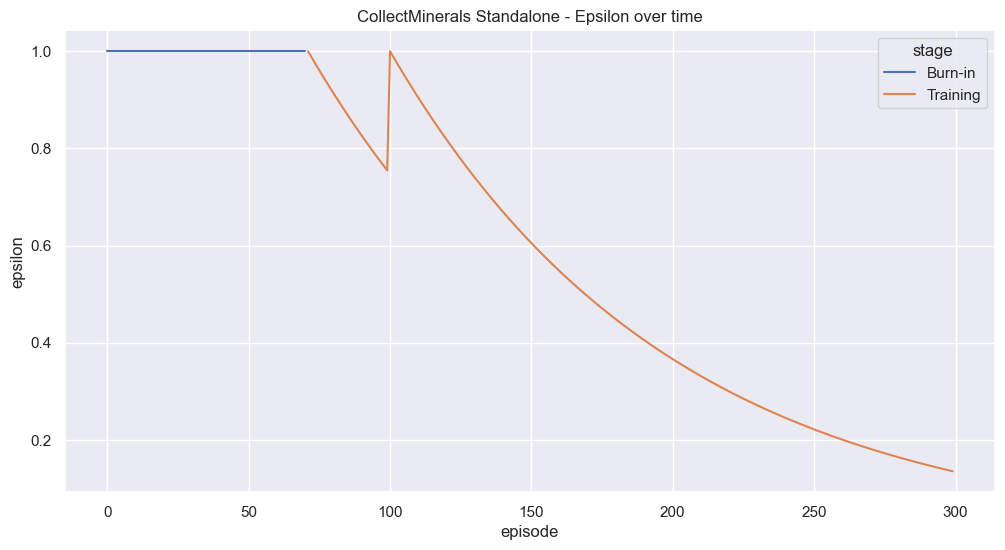

,map_name,reward,steps,epsilon,losses,emissions,score,is_training,is_exploit,is_random_mode,episode,stage,loss
0,CollectMineralsAndGas,2750.0,141,1.0,[],0.000221,0,False,False,False,0,Burn-in,NaN
1,CollectMineralsAndGas,3395.0,141,1.0,[],0.000463,0,False,False,False,1,Burn-in,NaN
2,CollectMineralsAndGas,3390.0,141,1.0,[],0.000711,0,False,False,False,2,Burn-in,NaN
3,CollectMineralsAndGas,3090.0,141,1.0,[],0.000957,0,False,False,False,3,Burn-in,NaN
4,CollectMineralsAndGas,2800.0,141,1.0,[],0.001202,0,False,False,False,4,Burn-in,NaN


In [49]:
episode_stats, agent_stats, aggregated_stats = load_stats(collect_minerals_model_id, model_name="CollectMinerals Standalone")
episode_stats.head()

In [38]:
agent_stats.head(10)

,map_name,step_count,episode_count,total_reward,total_score,total_emissions
0,CollectMineralsAndGas,42300,300,1045710.0,0,10.252701


In [39]:
aggregated_stats.head(10)

,map_name,rewards,scores,epsilons,losses,steps,emissions,max_reward,max_score
0,CollectMineralsAndGas,"[2750.0, 3395.0, 3390.0, 3090.0, 2800.0, 3605....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[141, 141, 141, 141, 141, 141, 141, 141, 141, ...","[0.00022097196751884513, 0.0004629719376525588...",4585.0,0


# Build marines

Total episodes: 300
Total burnin episodes: 33
Total random mode episodes: 0
Total episodes: 267
Total exploit episodes: 0
Unique maps in episode stats:  ['BuildMarines']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


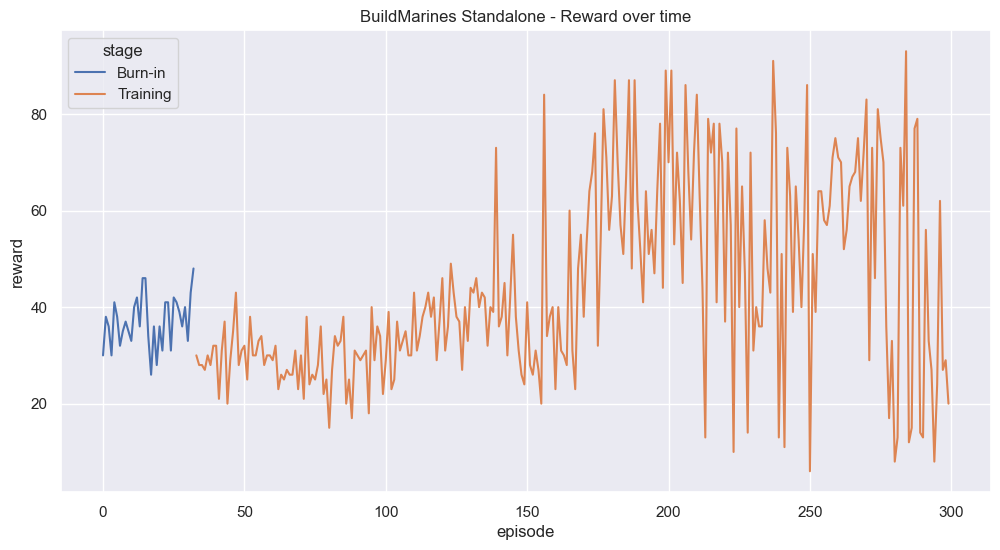

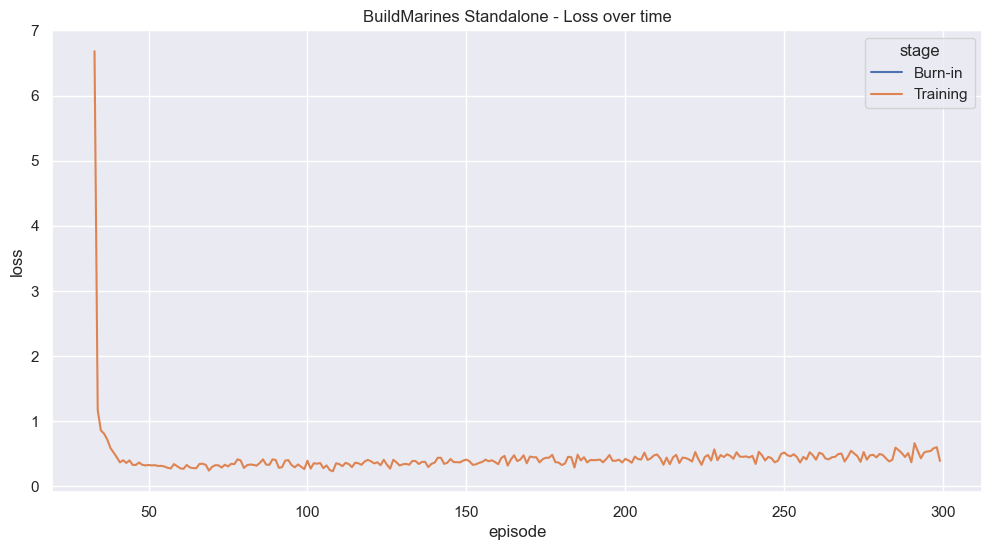

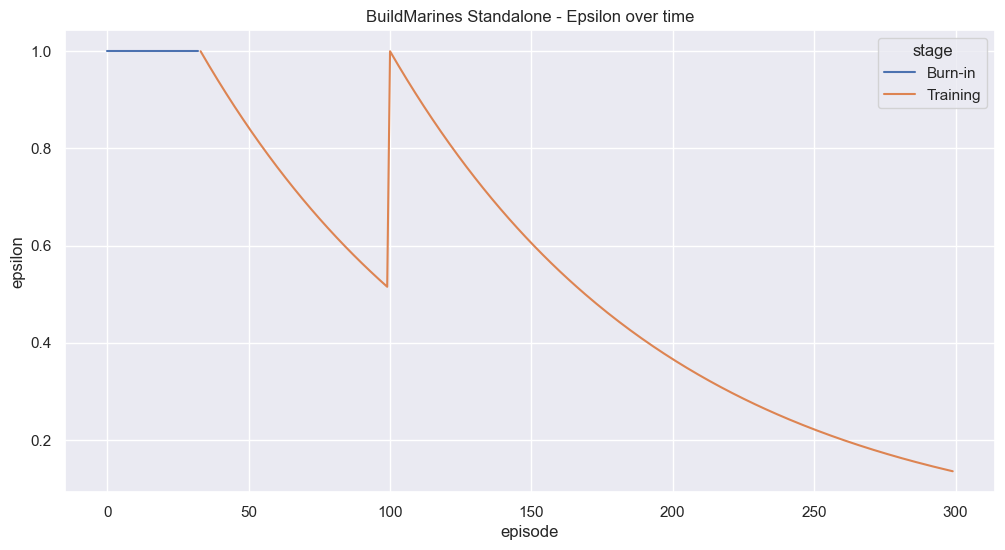

,map_name,reward,steps,epsilon,losses,emissions,score,is_training,is_exploit,is_random_mode,episode,stage,loss
0,BuildMarines,30.0,301,1.0,[],0.000702,0,False,False,False,0,Burn-in,NaN
1,BuildMarines,38.0,301,1.0,[],0.001689,0,False,False,False,1,Burn-in,NaN
2,BuildMarines,36.0,301,1.0,[],0.002645,0,False,False,False,2,Burn-in,NaN
3,BuildMarines,30.0,301,1.0,[],0.003642,0,False,False,False,3,Burn-in,NaN
4,BuildMarines,41.0,301,1.0,[],0.004592,0,False,False,False,4,Burn-in,NaN


In [50]:
episode_stats, agent_stats, aggregated_stats = load_stats(build_marines_model_id, model_name="BuildMarines Standalone")
episode_stats.head()

# Defeat Roaches

Total episodes: 300
Total burnin episodes: 300
Total random mode episodes: 0
Total episodes: 0
Total exploit episodes: 0
Unique maps in episode stats:  ['DefeatRoaches']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


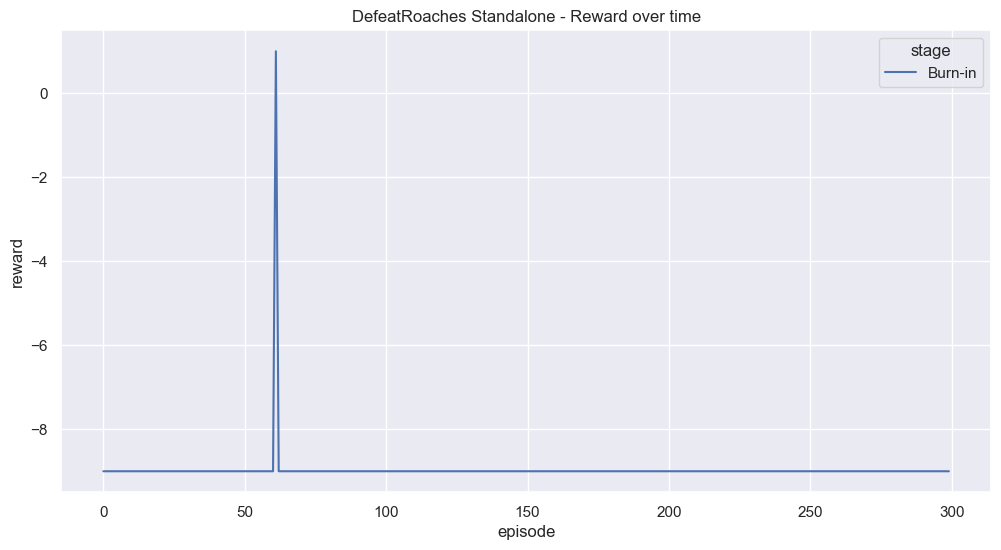

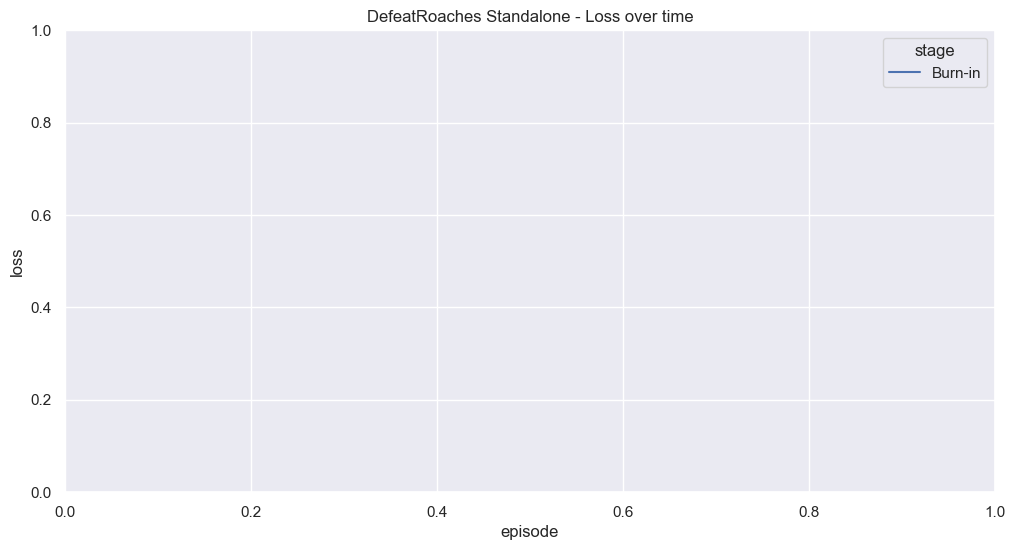

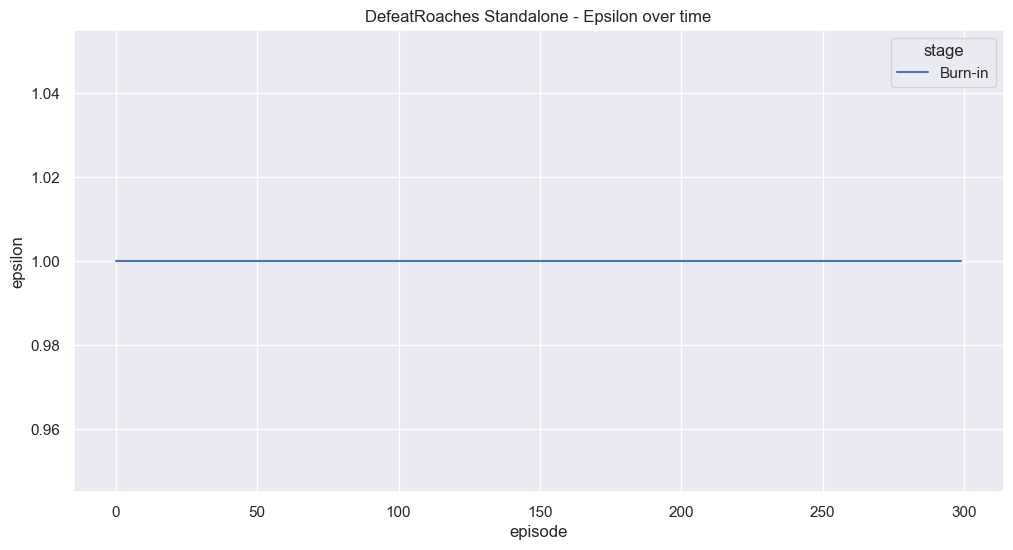

,map_name,reward,steps,epsilon,losses,emissions,score,is_training,is_exploit,is_random_mode,episode,stage,loss
0,DefeatRoaches,-9.0,30,1.0,[],0.000082,0,False,False,False,0,Burn-in,NaN
1,DefeatRoaches,-9.0,19,1.0,[],0.000149,0,False,False,False,1,Burn-in,NaN
2,DefeatRoaches,-9.0,26,1.0,[],0.000220,0,False,False,False,2,Burn-in,NaN
3,DefeatRoaches,-9.0,20,1.0,[],0.000288,0,False,False,False,3,Burn-in,NaN
4,DefeatRoaches,-9.0,21,1.0,[],0.000355,0,False,False,False,4,Burn-in,NaN


In [51]:
episode_stats, agent_stats, aggregated_stats = load_stats(defeat_roaches_model_id, model_name="DefeatRoaches Standalone")
episode_stats.head()

# Defeat Zerglings

Total episodes: 300
Total burnin episodes: 300
Total random mode episodes: 0
Total episodes: 0
Total exploit episodes: 0
Unique maps in episode stats:  ['DefeatZerglingsAndBanelings']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


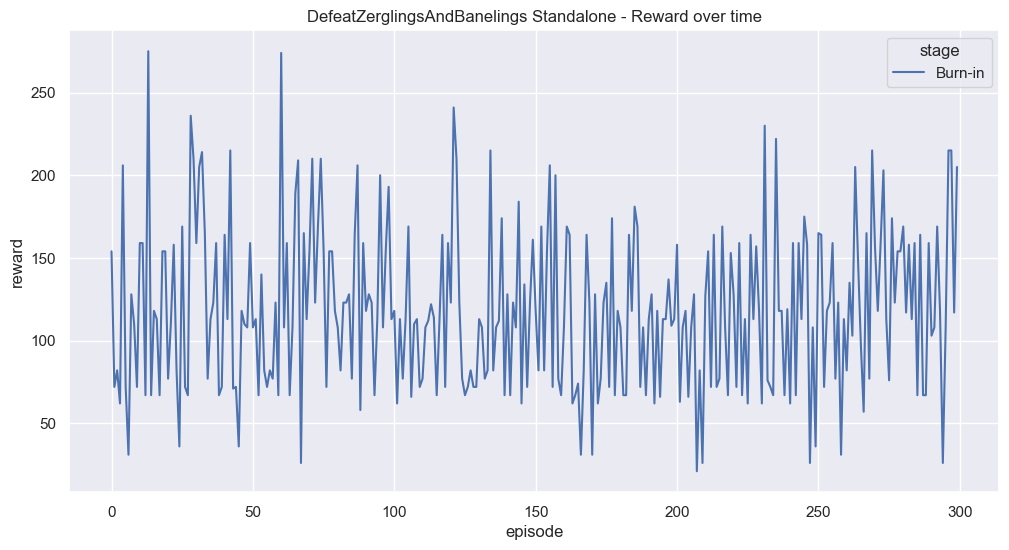

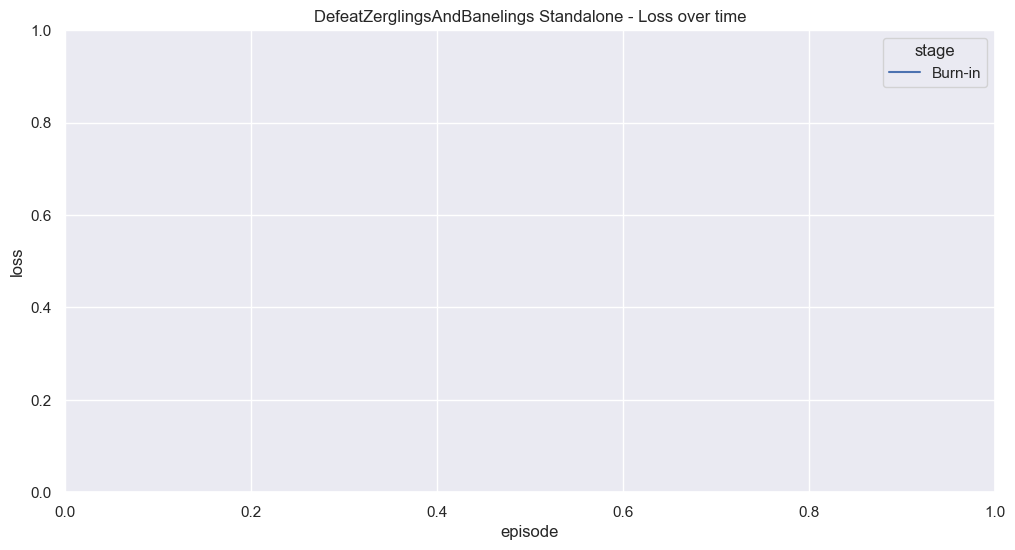

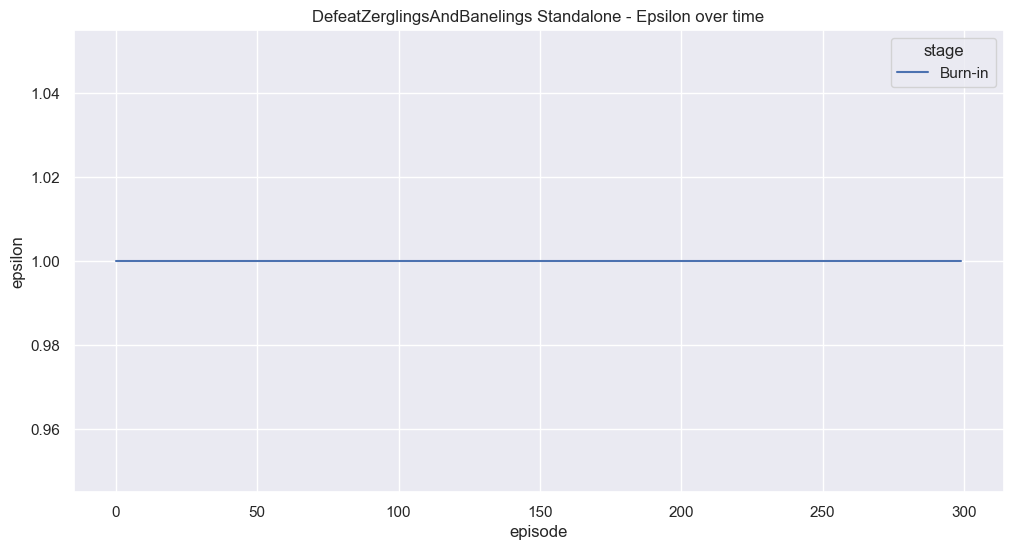

,map_name,reward,steps,epsilon,losses,emissions,score,is_training,is_exploit,is_random_mode,episode,stage,loss
0,DefeatZerglingsAndBanelings,154.0,18,1.0,[],0.000080,0,False,False,False,0,Burn-in,NaN
1,DefeatZerglingsAndBanelings,72.0,27,1.0,[],0.000153,0,False,False,False,1,Burn-in,NaN
2,DefeatZerglingsAndBanelings,82.0,19,1.0,[],0.000222,0,False,False,False,2,Burn-in,NaN
3,DefeatZerglingsAndBanelings,62.0,16,1.0,[],0.000293,0,False,False,False,3,Burn-in,NaN
4,DefeatZerglingsAndBanelings,206.0,41,1.0,[],0.000735,0,False,False,False,4,Burn-in,NaN


In [54]:
episode_stats, agent_stats, aggregated_stats = load_stats(defeat_zerglings_model_id, model_name="DefeatZerglingsAndBanelings Standalone")
episode_stats.head()

# Simple64

Total episodes: 300
Total burnin episodes: 24
Total random mode episodes: 0
Total episodes: 276
Total exploit episodes: 0
Unique maps in episode stats:  ['Simple64']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


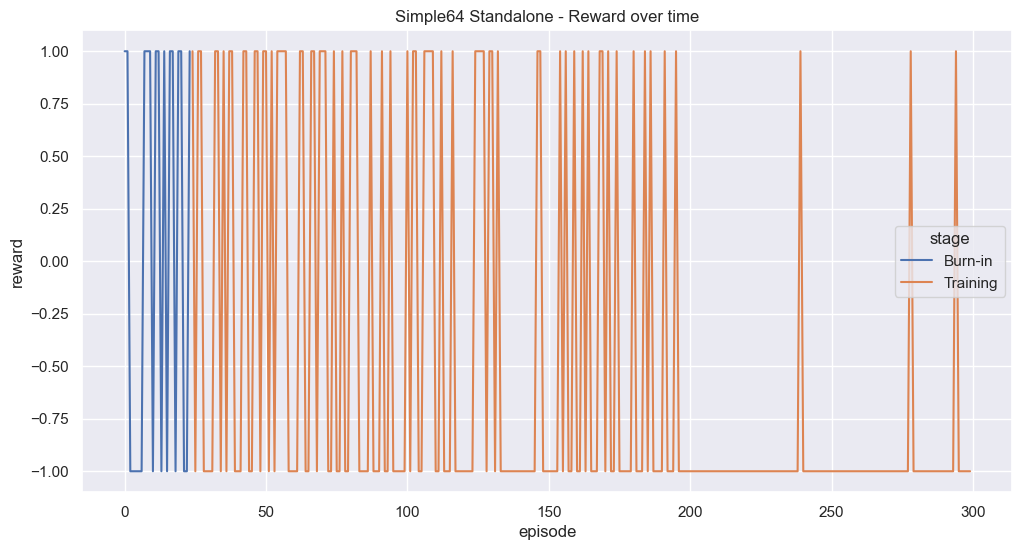

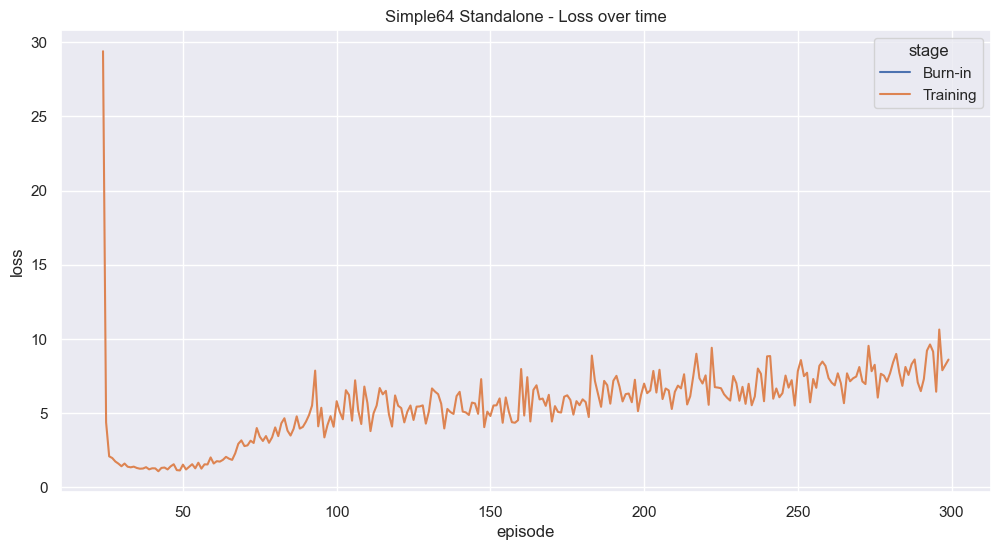

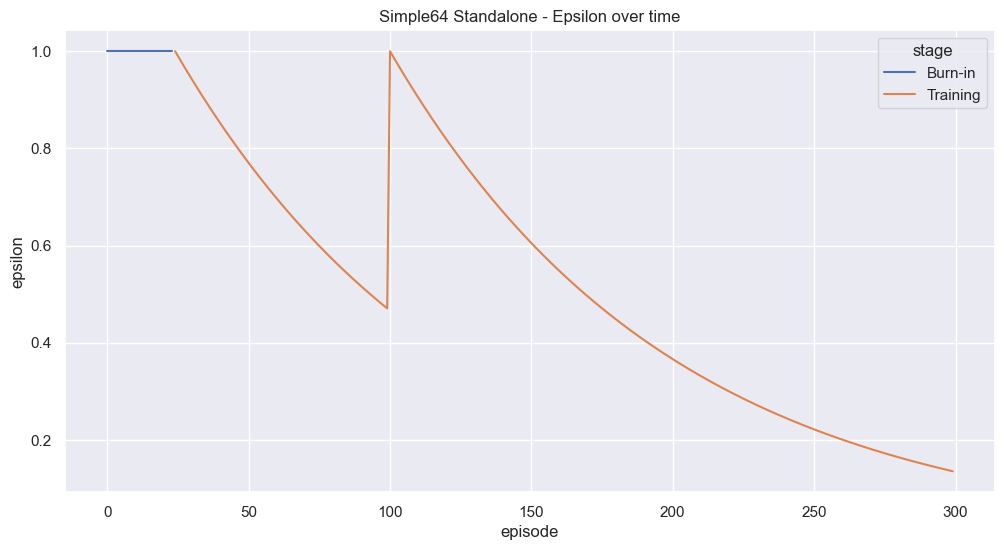

,map_name,reward,steps,epsilon,losses,emissions,score,is_training,is_exploit,is_random_mode,episode,stage,loss
0,Simple64,1.0,241,1.0,[],0.000915,0,False,False,False,0,Burn-in,NaN
1,Simple64,1.0,277,1.0,[],0.002814,0,False,False,False,1,Burn-in,NaN
2,Simple64,-1.0,451,1.0,[],0.007934,0,False,False,False,2,Burn-in,NaN
3,Simple64,-1.0,667,1.0,[],0.015654,0,False,False,False,3,Burn-in,NaN
4,Simple64,-1.0,456,1.0,[],0.014736,0,False,False,False,4,Burn-in,NaN


In [55]:
episode_stats, agent_stats, aggregated_stats = load_stats(simple64_model_id, model_name="Simple64 Standalone")
episode_stats.head()